In [9]:
!pip install selenium

In [46]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import time
import re

driver= webdriver.Chrome('C:\\Users\\ljh\\Desktop\\assignment5\\chromedriver.exe')
driver2= webdriver.Chrome('C:\\Users\\ljh\\Desktop\\assignment5\\chromedriver.exe')

skin_address=['https://www.glowpick.com/beauty/ranking?id=2','https://www.glowpick.com/beauty/ranking?id=4','https://www.glowpick.com/beauty/ranking?id=3','https://www.glowpick.com/beauty/ranking?id=5','https://www.glowpick.com/beauty/ranking?id=210','https://www.glowpick.com/beauty/ranking?id=6','https://www.glowpick.com/beauty/ranking?id=1']
#순서대로 스킨, 에센스, 로션, 크림, 토너/필링패드,페이스오일,미스트
index_name=['스킨','에센스','로션','크림','토너/필링패드','페이스오일','미스트']
category_name=[]
product_name=[]
brand_name=[]
age=[]
skintype=[]
sex=[]
score=[]
result=pd.DataFrame()
idx=0
for skincare in skin_address:#스킨,에센스...미스트까지 반복 되도록
    driver.get(skincare)##이 사이트에 이만큼만 들어감
    body= driver.find_element_by_tag_name("body")
    driver.find_element_by_tag_name("h1").click()
    num_of_pagedowns=9
    while num_of_pagedowns:
        body.send_keys(Keys.PAGE_DOWN)
        time.sleep(0.3)
        num_of_pagedowns-=1#페이지 10번 내림

    html=driver.page_source
    soup=BeautifulSoup(html,'html.parser')
    list=soup.select('ul.list-wrap > li')
    cnt=0
    for data in list:
        temp_product_name=str(data.select_one('meta').attrs['content'])#제품이름 추출
        detail_url=data.select_one('meta:nth-child(2)').attrs['content']
        temp_brand_name=str(data.select_one('.brand')).split('>')[1].split('<')[0]
        print(temp_brand_name)
        driver2.get(detail_url)
        detail_body=driver2.find_element_by_tag_name("body")
        driver2.find_element_by_tag_name("h1").click()
        detail_down=50
        while detail_down:
            detail_body.send_keys(Keys.PAGE_DOWN)
            time.sleep(0.3)
            detail_down-=1
            detail=driver2.page_source
        dsoup=BeautifulSoup(detail,'html.parser')
     
        dlist=dsoup.select('.info')#나이, 피부타입, 성별, 평가 추출


        for i in dlist:
            category_name.append(index_name[idx])
            brand_name.append(temp_brand_name)
            product_name.append(temp_product_name)
            temp=re.compile('[0-9]+세|[가-힣]+').findall(str(i))
            age.append(temp[0])
            skintype.append(temp[1])
            sex+=str(i).split('icon-gender-')[1].split('"')[0]
            score.append(str(i).split('gpa-')[1].split('"')[0].split('-')[0])
        cnt+=1
        if cnt==20: break
    idx+=1

        
            #print(product_name,brand_name,temp,age,skintype,sex,score)
driver.close()
driver2.close()


코스알엑스 (COSRX)
비플랫 (be Flat)
프레쥬 (Fraijour)
보타니티 (BOTANITY)
이솔 (2SOL)
아이소이 (isoi)
킵쿨 (KEEP COOL)
빌리프 (belif)
유리프 (youlief)
토니모리 (TONYMORY)
프리메라 (primera)
리얼베리어 (Real Barrier)
프리메라 (primera)
하루하루 (Haruharu)
한율 (hanyul)
해서린 (HATHERINE)
클레어스 (dear, klairs)
아티스트리 (ARTISTRY)
프리메라 (primera)
에스트라 (AESTURA)
로지컬리스킨 (Logically Skin)
빌리프 (belif)
스팀베이스 (STEAMBASE)
토리든 (Torriden)
코스알엑스 (COSRX)
빌리프 (belif)
코스알엑스 (COSRX)
리메코스 (REMACOS)
미샤 (MISSHA)
스킨푸드 (SKINFOOD)
록시땅 (LOCCITANE)
이즈앤트리 (IsNtree)
티엘스 (T'else)
킵쿨 (KEEP COOL)
구달 (goodal)
셀리맥스 (celimax)
에스티 로더 (ESTEE LAUDER)
리프레쉬 바이 리엔케이 (Refresh by Re:NK)
헤라 (HERA)
미샤 (MISSHA)
에스트라 (AESTURA)
제로이드 (ZEROID)
유리프 (youlief)
더마비 (DermaB)
빌리프 (belif)
아이오페 (IOPE)
에스트라 (AESTURA)
빌리프 (belif)
제로이드 (ZEROID)
라포티셀 (LAPOTHICELL)
킵쿨 (KEEP COOL)
한율 (hanyul)
아토팜 (ATOPALM)
세타필 (Cetaphil)
닥터벨머 (Dr.Belmeur)
Dr.G (닥터지)
셀라피 (Cellapy)
듀이트리 (DEWYTREE)
잇퍼 (itfer)
이니스프리 (innisfree)
닥터벨머 (Dr.Belmeur)
유리프 (youlief)
유세린 (Eucerin)
참존 (CHARMZONE)
아이오페 (IOPE)
에스트라 (AESTURA)
아티스트리 (ARTIST

In [291]:
result_category_name=category_name
result_brand_name=brand_name
result_product_name=product_name
result_age=age
result_sex=sex
result_score=score
result_skintype=skintype

index = 0

def chtoint(i) :
    if i=='best':
        return 5
    elif i=='good':
        return 4
    elif i=='soso':
        return 3
    elif i=='bad':
        return 2
    elif i=='worst':
        return 1


#for i in result_age:
#    result_age[index] = int(i.rstrip('세'))
#    index = index + 1


temp=pd.DataFrame({'category':result_category_name,'brand':result_brand_name,'skintype':skintype,'product':result_product_name,'age':result_age,'sex':result_sex,'score':result_score})
temp.score=temp.score.apply(chtoint)
temp.to_csv('./result.csv',encoding='utf-8-sig')
temp





    

    

,category,brand,skintype,product,age,sex,score
0,스킨,코스알엑스 (COSRX),복합성,풀핏 프로폴리스 시너지 토너,33,f,4
1,스킨,코스알엑스 (COSRX),복합성,풀핏 프로폴리스 시너지 토너,24,f,5
2,스킨,코스알엑스 (COSRX),복합성,풀핏 프로폴리스 시너지 토너,34,f,5
3,스킨,코스알엑스 (COSRX),건성,풀핏 프로폴리스 시너지 토너,25,f,4
4,스킨,코스알엑스 (COSRX),건성,풀핏 프로폴리스 시너지 토너,25,f,5
5,스킨,코스알엑스 (COSRX),복합성,풀핏 프로폴리스 시너지 토너,27,f,5
6,스킨,코스알엑스 (COSRX),지성,풀핏 프로폴리스 시너지 토너,16,f,5
7,스킨,코스알엑스 (COSRX),건성,풀핏 프로폴리스 시너지 토너,27,f,5
8,스킨,코스알엑스 (COSRX),건성,풀핏 프로폴리스 시너지 토너,30,f,4
9,스킨,코스알엑스 (COSRX),복합성,풀핏 프로폴리스 시너지 토너,26,f,5


In [272]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'gulim'
cnt=0
meanage=[]
brandde=temp.brand.unique()
for i in brandde:
    meanage.append(temp[temp.brand==i].age.mean())

result=pd.DataFrame({'brand':brandde,'averageAge':meanage})
result




,brand,averageAge
0,코스알엑스 (COSRX),24.767391
1,비플랫 (be Flat),25.069149
2,프레쥬 (Fraijour),24.260000
3,보타니티 (BOTANITY),25.465000
4,이솔 (2SOL),27.380952
5,아이소이 (isoi),26.750000
6,킵쿨 (KEEP COOL),26.874510
7,빌리프 (belif),28.073477
8,유리프 (youlief),27.220000
9,토니모리 (TONYMORY),23.860000


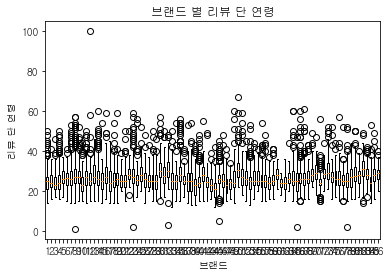

In [274]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
wait=[]
for i in brandde:
    wait.append(temp[temp.brand==i].age)

ax.boxplot(wait)
ax.set_xlabel('브랜드')
ax.set_ylabel('리뷰 단 연령')
ax.set_title("브랜드 별 리뷰 단 연령")
data=pd.read_csv('./result2.csv')

In [277]:
temp.groupby('brand').describe()

age                                    \
                                   count       mean       std   min    25%   
brand                                                                        
CNP (씨앤피)                          200.0  25.975000  6.296236   2.0  22.00   
Dr.G (닥터지)                         300.0  24.846667  5.146986  15.0  22.00   
NOW Foods                          200.0  27.170000  6.633333  15.0  23.00   
강남이스트 (gangnamist)                 100.0  24.080000  4.270358  16.0  20.75   
겔랑 (GUERLAIN)                      100.0  29.440000  4.967206  18.0  26.00   
구달 (goodal)                        200.0  25.365000  5.759133  15.0  21.00   
그라운드플랜 (GROUND PLAN)               100.0  28.350000  5.388681  16.0  25.00   
나이팅게일 (Nightingale)                 90.0  24.544444  4.502586  16.0  21.00   
네오젠 더마로지 (NEOGEN DERMALOGY)        100.0  27.560000  7.329641  16.0  23.00   
닥터벨머 (Dr.Belmeur)                  200.0  22.935000  6.027639  13.0  18.00   
더랩 바이 블랑두 (THE LAB by blanc doux)   59.0  26.491525  5.076562  20.0  23.00   
더마비 (DermaB)                       100.0  24.940000  6.039968  15.0  21.00   
더마토리 (DERMATORY)                   200.0  25.025000  5.301405  15.0  22.00   
더샘 (the SAEM)                      200.0  23.430000  5.097551  15.0  19.00   
데저트에센스 (DESERT ESSENCE)             54.0  27.833333  6.532213  16.0  24.25   
듀이트리 (DEWYTREE)                    100.0  24.680000  5.171562  15.0  22.00   
라네즈 (LANEIGE)                      100.0  26.780000  6.514289  15.0  23.00   
라포티셀 (LAPOTHICELL)                  62.0  26.112903  4.882571  17.0  23.25   
라헬 (RAHEL)                         100.0  28.030000  7.243883  18.0  23.00   
로벡틴 (ROVECTIN)                     100.0  27.170000  5.152336  16.0  24.00   
로지컬리스킨 (Logically Skin)            100.0  26.210000  6.331411  14.0  23.00   
록시땅 (LOCCITANE)                    100.0  28.890000  5.336921  20.0  25.00   
리메코스 (REMACOS)                      63.0  29.079365  4.433384  18.0  26.00   
리얼베리어 (Real Barrier)               265.0  26.554717  7.028475  15.0  23.00   
리프레쉬 바이 리엔케이 (Refresh by Re:NK)    100.0  28.280000  6.459008  17.0  24.00   
미샤 (MISSHA)                        300.0  27.886667  6.866171   2.0  24.00   
바디버든프로젝트 (BODYBURDEN PROJECT)       72.0  26.861111  5.768554  15.0  23.00   
벨라몬스터 (BELLAMONSTER)                44.0  26.931818  4.546390  20.0  24.00   
보타니티 (BOTANITY)                    200.0  25.465000  6.566152  16.0  21.00   
보타닉힐 보 (boH)                       100.0  25.440000  5.267242  15.0  23.00   
...                                  ...        ...       ...   ...    ...   
올리세 (OLYSee)                       100.0  24.190000  6.054792  14.0  20.00   
원데이즈유 (One day's you)              100.0  28.480000  3.102557  21.0  26.00   
유리프 (youlief)                      300.0  27.220000  5.260276  15.0  24.00   
유세린 (Eucerin)                      200.0  26.055000  5.265988   5.0  24.00   
이니스프리 (innisfree)                  100.0  21.300000  5.076187  12.0  17.00   
이솔 (2SOL)                           63.0  27.380952  4.555849  17.0  24.00   
이즈앤트리 (IsNtree)                    173.0  25.606936  5.334874  14.0  22.00   
일리윤 (ILLIYOON)                      81.0  26.802469  8.320787  14.0  22.00   
잇퍼 (itfer)                         196.0  23.423469  4.209788  16.0  20.00   
제로이드 (ZEROID)                      200.0  25.950000  6.352897  12.0  21.00   
쥴라이 (JULLAI)                        64.0  29.093750  4.010774  20.0  26.75   
참존 (CHARMZONE)                      78.0  25.294872  6.071242  14.0  22.00   
코스알엑스 (COSRX)                      460.0  24.767391  5.476850  14.0  21.00   
클라란스 (CLARINS)                     100.0  30.650000  6.665720  21.0  26.00   
클레어스 (dear, klairs)                158.0  28.183544  6.673303  16.0  24.00   
킵쿨 (KEEP COOL)                     255.0  26.874510  6.679380  14.0  23.00   
토니모리 (TONYMORY)                    100.0  23.860000  6.036957  15.0  20.00   
토리든 (Torriden)                     100.0  25.690000  5.9860

In [290]:
skintypeVer=pd.pivot_table(temp[['category','product','skintype','score']],index=['category','product'],columns='skintype')
skintypeVer

score                      \
skintype                                            건성       민감성       복합성   
category product                                                             
로션       MLE 로션                               4.333333  4.230769  4.085714   
         데일리 멀티 카밍 젤                          4.285714  4.277778  4.073171   
         데일리리페어 모이스처라이저                       4.200000  4.428571  4.162162   
         레드 블레미쉬 멀티 플루이드                      4.111111  3.764706  3.970588   
         모이스춰라이징 로션                           4.315789  4.062500  4.279070   
         밀키 모이스춰라이저 하이드라 밸런싱                  3.894737  3.533333  3.974359   
         세라마이드 하이드라 플루이드                      4.214286  4.222222  4.130435   
         셋업 에멀전                               4.093750  4.500000  4.055556   
         수드 대나무 로션                            4.103448  4.280000  4.750000   
         수딩로션                                 4.692308  4.115385  4.161290   
         슈퍼바이탈 에멀젼 엑스트라 컨센트레이티드               4.030303  4.000000  4.205128   
         아토베리어 365 로션                         4.136364  4.111111  4.222222   
         아토베리어 로션                             4.428571  4.100000  4.413043   
         어린쑥 수분진정 플루이드                        4.047619  4.050000  3.947368   
         에이리페어 오리지날 로션                        4.192308  4.000000  3.780488   
         오트 마일드 모이스처 인텐시브 로션                  4.193548  3.642857  4.000000   
         울트라바이탈라이징 스네일 에멀전                    4.026316  4.111111  3.973684   
         인텐시브로션                               4.250000  4.238095  4.212121   
         크리미 모이스춰라이저 딥 모이스트                   4.285714  4.444444  3.969697   
         하이드로 인텐시브 모이스쳐라이징 에멀젼                     NaN  3.921569  4.157895   
미스트      24시간 시크릿 미스트 플러스                     4.040000  4.150000  4.000000   
         굳세라 수퍼 세라마이드 미스트                     4.148148  4.538462  4.232558   
         더마 인텐시브 판테놀 크림 미스트                   4.333333  4.400000  4.309524   
         모이스춰 바운드 스킨 에너지 미스트                  4.285714  3.875000  4.026316   
         뮤제너 앰플 미스트                           4.115385  3.750000  3.825000   
         보떼 이니샬 에너자이징 멀티 프로텍션 컨센트레이트 스프레이 쎄럼  4.000000  3.583333  4.073171   
         씨워터 알게 미스트                           4.111111  4.750000  4.200000   
         아쿠아포린 액티브 미스트 스프레이                   4.137931  3.842105  4.205128   
         아토베리어 365 크림 미스트                     4.000000  4.062500  4.303030   
         어린쑥 수분 진정수                           4.125000  3.750000  4.111111   
...                                                ...       ...       ...   
토너/필링패드  올리고 히알루론산 7멀티 포뮬라 패드                 4.533333  4.562500  4.550000   
         원스텝 그린 히어로 카밍 패드                     3.720000  3.875000  3.804878   
         원스텝 오리지널 클리어 패드                      4.055556  4.357143  3.954545   
         지우개 패드                               4.107143  3.923077  4.054054   
         청귤 비타 C 토너 패드                        3.904762  3.533333  3.750000   
         테르물레 클리어 패드                          4.071429  4.181818  4.325000   
         토닝 필링패드 [티트리]                        4.263158  4.000000  4.086957   
         하이포알러제닉 모이스처라이징 크림 보습패드              4.043478  4.000000  3.916667   
         하이포알러제닉 시카 레스큐 거즈 패드                 3.947368  3.875000  3.693878   
         헬프미 닥토 패드                            4.086957  4.200000  3.875000   
페이스오일    100% 오가닉 호호바 오일                      4.470588  4.444444  4.555556   
         골든 글로우 페이스 오일                        4.500000  4.153846  4.150000   
         굳세라 수퍼 세라마이드 모이스춰 밤                  3.823529  4.333333  4.181818   
         굳세라 수퍼 세라마이드 에센셜 오일                  4.405405  4.200000  4.258065   
         냉압착 호호바 오일                           4.000000  3.500000  4.170213   
         미라클 씨드 컨센트레이트 오일                     3.939394  3.933333  4.268293   
         슈퍼 12 바운스 씬 오일                       4.187500  4.600000  4.117647   
         스킨 이센셜즈 배리어 리페어 페이스 오일               3.965517  3.800000  4.048

skintype          product  age sex  score
코스알엑스 (COSRX)        스킨       복합성  풀핏 프로폴리스 시너지 토너   33   f   good
                     스킨       복합성  풀핏 프로폴리스 시너지 토너   24   f   best
                     스킨       복합성  풀핏 프로폴리스 시너지 토너   34   f   best
                     스킨        건성  풀핏 프로폴리스 시너지 토너   25   f   good
                     스킨        건성  풀핏 프로폴리스 시너지 토너   25   f   best
                     스킨       복합성  풀핏 프로폴리스 시너지 토너   27   f   best
                     스킨        지성  풀핏 프로폴리스 시너지 토너   16   f   best
                     스킨        건성  풀핏 프로폴리스 시너지 토너   27   f   best
                     스킨        건성  풀핏 프로폴리스 시너지 토너   30   f   good
                     스킨       복합성  풀핏 프로폴리스 시너지 토너   26   f   best
                     스킨        건성  풀핏 프로폴리스 시너지 토너   24   f   good
                     스킨       복합성  풀핏 프로폴리스 시너지 토너   23   f   best
                     스킨       복합성  풀핏 프로폴리스 시너지 토너   36   f   good
                     스킨        건성  풀핏 프로폴리스 시너지 토너   50   f   best
                     스킨        지성  풀핏 프로폴리스 시너지 토너   17   f   best
                     스킨       복합성  풀핏 프로폴리스 시너지 토너   28   f   best
                     스킨       복합성  풀핏 프로폴리스 시너지 토너   34   f   best
                     스킨       복합성  풀핏 프로폴리스 시너지 토너   23   f   good
                     스킨       복합성  풀핏 프로폴리스 시너지 토너   25   f   good
                     스킨        중성  풀핏 프로폴리스 시너지 토너   29   f   best
                     스킨        건성  풀핏 프로폴리스 시너지 토너   25   f   best
                     스킨       복합성  풀핏 프로폴리스 시너지 토너   26   f   best
                     스킨        지성  풀핏 프로폴리스 시너지 토너   24   f   best
                     스킨       복합성  풀핏 프로폴리스 시너지 토너   23   f   best
                     스킨        건성  풀핏 프로폴리스 시너지 토너   31   f   best
                     스킨        지성  풀핏 프로폴리스 시너지 토너   24   f   best
                     스킨        건성  풀핏 프로폴리스 시너지 토너   23   f   soso
                     스킨       복합성  풀핏 프로폴리스 시너지 토너   24   f   good
                     스킨       복합성  풀핏 프로폴리스 시너지 토너   25   f   good
                     스킨        지성  풀핏 프로폴리스 시너지 토너   24   f   best
...                           ...              ...  ...  ..    ...
리얼베리어 (Real Barrier) 미스트      복합성          에센스 미스트   24   f  worst
                     미스트      복합성          에센스 미스트   28   f   soso
                     미스트      복합성          에센스 미스트   15   f   good
                     미스트      민감성          에센스 미스트   26   f   soso
                     미스트      복합성          에센스 미스트   19   f   good
                     미스트      복합성          에센스 미스트   18   f   soso
                     미스트       건성          에센스 미스트   26   f   good
                     미스트      민감성          에센스 미스트   16   f   good
                     미스트       건성          에센스 미스트   22   f   soso
                     미스트       건성          에센스 미스트   29   f    bad
                     미스트      복합성          에센스 미스트   33   f    bad
                     미스트       건성          에센스 미스트   23   f   good
                     미스트       건성          에센스 미스트   28   f   good
                     미스트      복합성          에센스 미스트   24   f   soso
                     미스트      복합성          에센스 미스트   25   f   good
                     미스트      복합성          에센스 미스트   21   f   good
                     미스트      민감성          에센스 미스트   30   f   soso
                     미스트      민감성          에센스 미스트   29   f   soso
                     미스트      복합성          에센스 미스트   25   f   soso
                     미스트       건성          에센스 미스트   15   f   soso
                     미스트      복합성          에센스 미스트   20   f   soso
                     미스트      복합성          에센스 미스트   26   f   soso
                     미스트      복합성          에센스 미스트   29   f   good
                     미스트       지성          에센스 미스트   25   f   good
                     미스트      복합성          에센스 미스트   31   f    bad
                     미스트       건성          에센스 미스트   26   f   good
                     미스트      복합성          에센스 미스트   19   f   good
                     미스트      민감성          에센스 미스트   31   f   soso
     

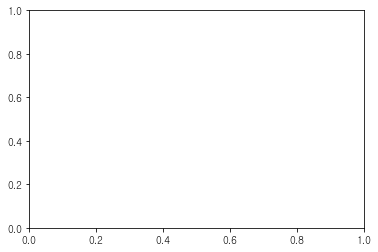

In [301]:
fig=plt.figure()
ax=fig.add_subplot()

ree=pd.DataFrame({'skintype':skintype,'product':result_product_name,'age':result_age,'sex':result_sex,'score':result_score},index=[result_brand_name,result_category_name]
                )
ree